## Damage model

In [148]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

In [149]:
omega = sp.symbols(r'omega')
s = sp.symbols('s')
psi = sp.symbols('psi')
E_b = sp.symbols(r'E_b')

In [150]:
tau_omega = psi * E_b * s

In [151]:
s_0, s_f = sp.symbols(r's_0, s_f')

In [152]:
kappa = sp.symbols('kappa')

### Damage rate controlled by the slope $s_\mathrm{f}$  
\begin{align}
g(\kappa) = 1 - \left[\frac{s_0}{\kappa} \exp \left(- \frac{\kappa - s_0}{s_f - s_0}\right)\right]
\end{align}

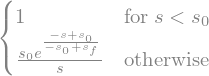

In [153]:
g_kappa =  (s_0 / s * sp.exp(-(s-s_0)/(s_f-s_0) ) )
g_ = sp.Piecewise(
    (1, s < s_0),
    (g_kappa, True)
)
g_

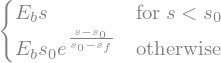

In [154]:
tau_ = tau_omega.subs(psi, g_)
sp.simplify(tau_)

In [155]:
get_g = sp.lambdify(
    (s, s_0, s_f,), g_, 'numpy'
)
get_tau = sp.lambdify(
    (s, E_b, s_0, s_f,), tau_, 'numpy'
)

In [156]:
s_arr = np.linspace(0.0001,5,100)

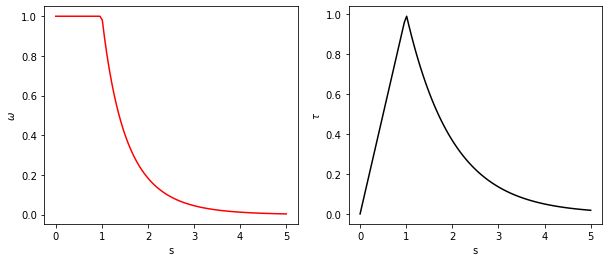

In [157]:
def plot_damage(s_arr, g_arr, tau_arr):
    _, (ax_omega, ax_tau) = plt.subplots(1,2,figsize=(10,4))
    ax_omega.plot(s_arr, g_arr, color='red')
    ax_tau.plot(s_arr, tau_arr, color='black');
    ax_omega.set_xlabel('s'); ax_omega.set_ylabel(r'$\omega$')
    ax_tau.set_xlabel('s'); ax_tau.set_ylabel(r'$\tau$');

_E_b, _s_0, _s_f = 1, 1, 2
plot_damage(s_arr,
            get_g(s_arr, _s_0, _s_f), 
            get_tau(s_arr, _E_b, _s_0, _s_f))

### Damage function used in Abaqus
\begin{align}
g(\kappa) = 1 -\left(\frac{s_0}{\kappa}\right)\left[ 1 - \frac{1 - \exp(- \alpha(\frac{\kappa - s_0}{s_u - s_0})}{1 - \exp(-\alpha)}  \right]
\end{align}


In [158]:
a, s_u = sp.symbols('a, s_u')

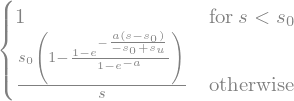

In [159]:
g_kappa =  (s_0 / s * (1 - (1 - sp.exp(-a*((s - s_0)/(s_u - s_0))   ) )
                       / (1 - sp.exp(-a))))
g_ = sp.Piecewise(
    (1, s < s_0),
    (g_kappa, True)
)
g_

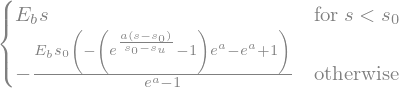

In [160]:
tau_ = tau_omega.subs(psi, g_)
sp.simplify(tau_)

In [161]:
get_g = sp.lambdify(
    (s, s_0, a, s_u,), g_, 'numpy'
)
get_tau = sp.lambdify(
    (s, E_b, s_0, a, s_u,), tau_, 'numpy'
)

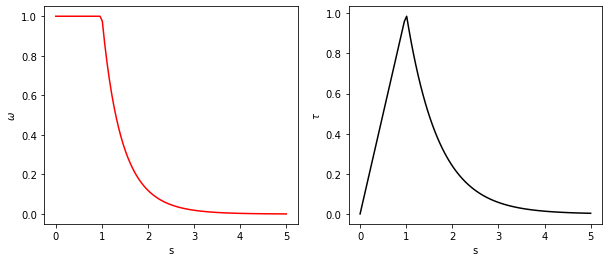

In [162]:
_E_b, _s_0, _a, _s_u = 1, 1, 10, 8
plot_damage(s_arr,
            get_g(s_arr, _s_0, _a, _s_u), 
            get_tau(s_arr, _E_b, _s_0, _a, _s_u))

### Damage function accounting for fracture energy and size
\begin{align}
g(\kappa) = 1- \displaystyle{\frac{ 1 }{E_b \kappa }}
f_t \exp\left( - \frac{f_t}{G_\mathrm{F}} \left(\kappa - s_0\right) L_\mathrm{s} \right)
\end{align}

In [163]:
f_t, G_f, L_s = sp.symbols('f_t, G_f, L_s')

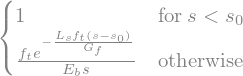

In [164]:
g_kappa =  1 / (E_b * s) * f_t * sp.exp(
    - f_t / G_f * (s - s_0) * L_s
)
g_ = sp.Piecewise(
    (1, s < s_0),
    (g_kappa, True)
)
g_

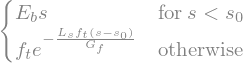

In [165]:
tau_ = tau_omega.subs(psi, g_)
sp.simplify(tau_)

In [166]:
get_g = sp.lambdify(
    (s, E_b, s_0, f_t, G_f, L_s,), g_, 'numpy'
)
get_tau = sp.lambdify(
    (s, E_b, s_0, f_t, G_f, L_s,), tau_, 'numpy'
)

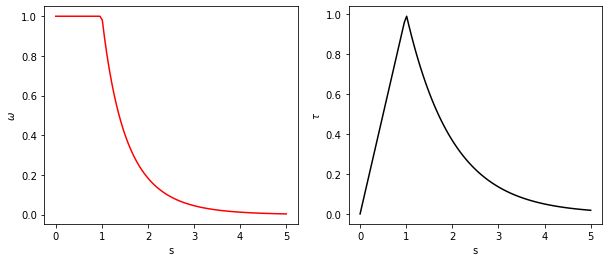

In [167]:
_E_b, _s_0, _f_t, _G_f, L_s = 1, 1, 1, 1, 1
plot_damage(s_arr,
            get_g(s_arr, _E_b, _s_0, _f_t, _G_f, L_s), 
            get_tau(s_arr, _E_b, _s_0, _f_t, _G_f, L_s))

## How to implement an algorithm?
* Where is the irreversibility?